In [1]:
import pandas as pd
from monai.transforms import (
    Compose,
    LoadImage,
    Resize,
    EnsureType
)
from monai.data import Dataset, DataLoader

from utils import visualize_distribution, visualize_ba

In [2]:
# Загрузка датасета
df = pd.read_excel(r'train\train.xlsx')
df.head()

,Unnamed: 0,ID,image_path,annotation_path_label,pathology
0,0,image_393.jpg,train\images\image_393.jpg,train\annotation\annotation_393.json,1
1,1,image_326.jpg,train\images\image_326.jpg,train\annotation\annotation_326.json,1
2,2,image_290.jpg,train\images\image_290.jpg,train\annotation\annotation_290.json,1
3,3,image_206.jpg,train\images\image_206.jpg,train\annotation\annotation_206.json,1
4,4,image_429.jpg,train\images\image_429.jpg,train\annotation\annotation_429.json,0


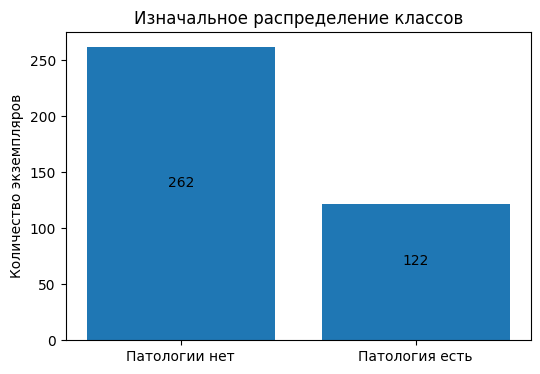

In [3]:
visualize_distribution(df)

In [4]:
# Разделение на классы
class_0 = df[df['pathology'] == 0]
class_1 = df[df['pathology'] == 1]

# Определение большего и меньшего классов
if len(class_0) > len(class_1):
    majority_class = class_0
    minority_class = class_1
else:
    majority_class = class_1
    minority_class = class_0

In [5]:
# Целевое количество сэмплов (среднее между классами)
target_samples = int((len(majority_class) + len(minority_class)) / 2)
print(f'Целевое количество сэмплов: {target_samples}')

Целевое количество сэмплов: 192


In [6]:
# Undersampling большего класса
majority_downsampled = majority_class.sample(n=target_samples, random_state=42)

print(f'Размер после урезания большего класса: {len(majority_downsampled)}')

Размер после урезания большего класса: 192


In [7]:
# Oversampling меньшего класса
minority_oversampled = minority_class.sample(replace=True, n=target_samples, random_state=14)
duplicates = minority_oversampled[minority_oversampled.duplicated()]

print(f'Размер после урезания большего класса {len(majority_downsampled)}\n',
      f'Количество дубликатов: {len(duplicates)}')

Размер после урезания большего класса 192
 Количество дубликатов: 98


In [8]:
# Склейка массивов двух классов
balanced_dataset = pd.concat([minority_oversampled, majority_downsampled])

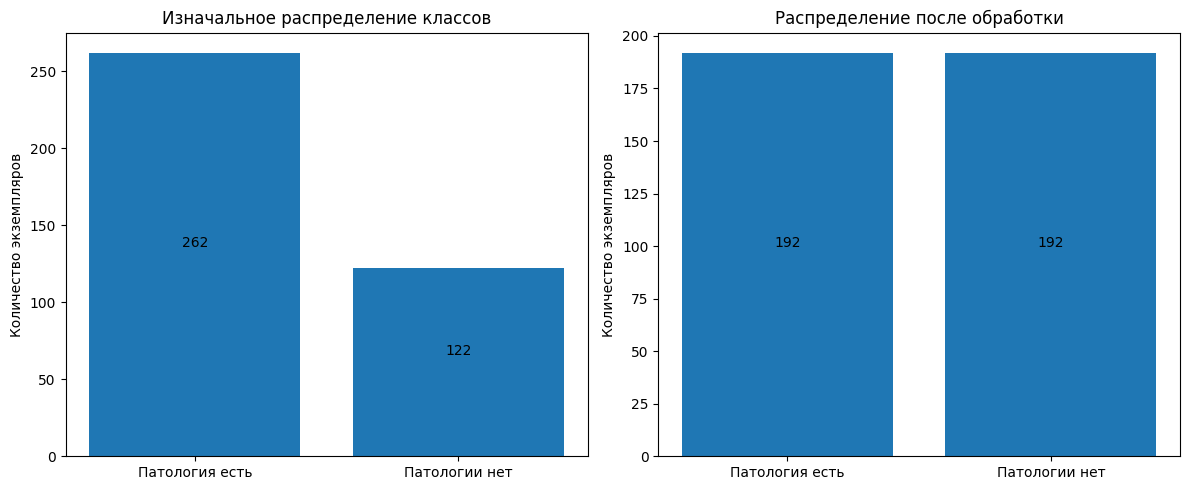

In [9]:
visualize_ba(df, balanced_dataset)

In [11]:
balanced_dataset.to_excel('train/balanced_dataset.xlsx', index=False)

# Дальше идеи по аугментации

In [ ]:
# Создание списка трансформаций для аугментации
train_transforms = Compose(
    [
        LoadImage(image_only=True),
        Resize((256, 256)),
        EnsureType()
    ]
)

In [ ]:
# Создание списка трансформаций для аугментации
train_transforms = Compose(
    [
        LoadImage(image_only=True),
        Resize((256, 256)),
        EnsureType()
    ]
)

# Функция для создания датасета MONAI
def create_dataset(dataframe):
    return Dataset(
        data=[
            {"image": row['image_path'], "label": row['class']}
            for _, row in dataframe.iterrows()
        ],
        transform=train_transforms
    )

# Создание DataLoader для сбалансированного датасета
balanced_loader = DataLoader(balanced_dataset, batch_size=16, shuffle=True)